<br>
<b>
    <font size="10" face="verdana">AI Fall 99 Project 0</font>
</b>
<hr>

## By Kimia Khabiri

## Introduction
The goal of this project is to get familiar with basic data structures and methods in <code>Pandas</code> python library. To achieve this goal, a demo project is defined. In this project, a data set of ads is given which has several data columns such as city, country and etc. which could be seen in part 1. The goal is to train a model which can predict whether an Ad is clicked or not based on these information.<br>

### Part 1
In this part data is read into the data frame and functions listed below are called on the data frame.
1. head: returns 5 first rows read (5 is a default number) in data frame type.
2. tail: returns 5 last rows read (5 default number) in data frame type
3. describe: returns some attributes such as mean and count of each column in data frame data type



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

data = pd.read_csv('advertising_dataset.csv', delimiter = ',')
data

Unnamed: 0  Daily Time Spent on Site   Age  Area Income  \
0             0                     68.95  35.0     61833.90   
1             1                     80.23  31.0     68441.85   
2             2                     69.47  26.0     59785.94   
3             3                     74.15  29.0     54806.18   
4             4                     68.37  35.0     73889.99   
..          ...                       ...   ...          ...   
995         995                     72.97  30.0     71384.57   
996         996                     51.30  45.0     67782.17   
997         997                     51.63  51.0     42415.72   
998         998                     55.55  19.0     41920.79   
999         999                       NaN  26.0     29875.80   

     Daily Internet Usage                          Ad Topic Line  \
0                  256.09     Cloned 5thgeneration orchestration   
1                     NaN     Monitored national standardization   
2                  236.50       Organic bottom-line service-desk   
3                  245.89  Triple-buffered reciprocal time-frame   
4                  225.58          Robust logistical utilization   
..                    ...                                    ...   
995                208.58          Fundamental modular algorithm   
996                134.42        Grass-roots cohesive monitoring   
997                120.37           Expanded intangible solution   
998                187.95   Proactive bandwidth-monitored policy   
999                178.35        Virtual 5thgeneration emulation   

               City  Gender                 Country            Timestamp  \
0       Wrightburgh  Female                 Tunisia  2016-03-27 00:53:11   
1         West Jodi    Male                   Nauru  2016-04-04 01:39:02   
2          Davidton  Female              San Marino  2016-03-13 20:35:42   
3    West Terrifurt    Male                   Italy  2016-01-10 02:31:19   
4      South Manuel  Female                 Iceland  2016-06-03 03:36:18   
..              ...     ...                     ...                  ...   
995       Duffystad    Male                 Lebanon  2016-02-11 21:49:00   
996     New Darlene    Male  Bosnia and Herzegovina  2016-04-22 02:07:01   
997   South Jessica    Male                Mongolia  2016-02-01 17:24:57   
998     West Steven  Female               Guatemala  2016-03-24 02:35:54   
999     Ronniemouth  Female                  Brazil  2016-06-03 21:43:21   

     Clicked on Ad  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
..             ...  
995            1.0  
996            1.0  
997            1.0  
998            0.0  
999            1.0  

[1000 rows x 11 columns]

In [2]:
data.head()

Unnamed: 0  Daily Time Spent on Site   Age  Area Income  \
0           0                     68.95  35.0     61833.90   
1           1                     80.23  31.0     68441.85   
2           2                     69.47  26.0     59785.94   
3           3                     74.15  29.0     54806.18   
4           4                     68.37  35.0     73889.99   

   Daily Internet Usage                          Ad Topic Line  \
0                256.09     Cloned 5thgeneration orchestration   
1                   NaN     Monitored national standardization   
2                236.50       Organic bottom-line service-desk   
3                245.89  Triple-buffered reciprocal time-frame   
4                225.58          Robust logistical utilization   

             City  Gender     Country            Timestamp  Clicked on Ad  
0     Wrightburgh  Female     Tunisia  2016-03-27 00:53:11            0.0  
1       West Jodi    Male       Nauru  2016-04-04 01:39:02            0.0  
2        Davidton  Female  San Marino  2016-03-13 20:35:42            0.0  
3  West Terrifurt    Male       Italy  2016-01-10 02:31:19            0.0  
4    South Manuel  Female     Iceland  2016-06-03 03:36:18            0.0

In [3]:
data.tail()

Unnamed: 0  Daily Time Spent on Site   Age  Area Income  \
995         995                     72.97  30.0     71384.57   
996         996                     51.30  45.0     67782.17   
997         997                     51.63  51.0     42415.72   
998         998                     55.55  19.0     41920.79   
999         999                       NaN  26.0     29875.80   

     Daily Internet Usage                         Ad Topic Line  \
995                208.58         Fundamental modular algorithm   
996                134.42       Grass-roots cohesive monitoring   
997                120.37          Expanded intangible solution   
998                187.95  Proactive bandwidth-monitored policy   
999                178.35       Virtual 5thgeneration emulation   

              City  Gender                 Country            Timestamp  \
995      Duffystad    Male                 Lebanon  2016-02-11 21:49:00   
996    New Darlene    Male  Bosnia and Herzegovina  2016-04-22 02:07:01   
997  South Jessica    Male                Mongolia  2016-02-01 17:24:57   
998    West Steven  Female               Guatemala  2016-03-24 02:35:54   
999    Ronniemouth  Female                  Brazil  2016-06-03 21:43:21   

     Clicked on Ad  
995            1.0  
996            1.0  
997            1.0  
998            0.0  
999            1.0

In [4]:
data.describe()

Unnamed: 0  Daily Time Spent on Site         Age   Area Income  \
count  1000.000000                907.000000  979.000000   1000.000000   
mean    499.500000                 64.794818   36.009193  55000.000080   
std     288.819436                 15.954841    8.783636  13414.634022   
min       0.000000                 32.600000   19.000000  13996.500000   
25%     249.750000                 50.615000   29.000000  47031.802500   
50%     499.500000                 67.940000   35.000000  57012.300000   
75%     749.250000                 78.555000   42.000000  65470.635000   
max     999.000000                 91.430000   61.000000  79484.800000   

       Daily Internet Usage  Clicked on Ad  
count            913.000000     832.000000  
mean             179.751271       0.496394  
std               43.957934       0.500288  
min              104.780000       0.000000  
25%              138.550000       0.000000  
50%              183.480000       0.000000  
75%              217.850000       1.000000  
max              269.960000       1.000000

### Part 2
Data type of each column is shown in this part and gender is being labled into 0 and 1 because the data needs to be numerical and not categorical in order to train a model with it.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  907 non-null    float64
 2   Age                       979 non-null    float64
 3   Area Income               1000 non-null   float64
 4   Daily Internet Usage      913 non-null    float64
 5   Ad Topic Line             1000 non-null   object 
 6   City                      1000 non-null   object 
 7   Gender                    1000 non-null   object 
 8   Country                   1000 non-null   object 
 9   Timestamp                 1000 non-null   object 
 10  Clicked on Ad             832 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [6]:
genderEnum = {"Gender":     {"Male": 1, "Female": 0}}
data.replace(genderEnum, inplace=True)
data.head()

Unnamed: 0  Daily Time Spent on Site   Age  Area Income  \
0           0                     68.95  35.0     61833.90   
1           1                     80.23  31.0     68441.85   
2           2                     69.47  26.0     59785.94   
3           3                     74.15  29.0     54806.18   
4           4                     68.37  35.0     73889.99   

   Daily Internet Usage                          Ad Topic Line  \
0                256.09     Cloned 5thgeneration orchestration   
1                   NaN     Monitored national standardization   
2                236.50       Organic bottom-line service-desk   
3                245.89  Triple-buffered reciprocal time-frame   
4                225.58          Robust logistical utilization   

             City  Gender     Country            Timestamp  Clicked on Ad  
0     Wrightburgh       0     Tunisia  2016-03-27 00:53:11            0.0  
1       West Jodi       1       Nauru  2016-04-04 01:39:02            0.0  
2        Davidton       0  San Marino  2016-03-13 20:35:42            0.0  
3  West Terrifurt       1       Italy  2016-01-10 02:31:19            0.0  
4    South Manuel       0     Iceland  2016-06-03 03:36:18            0.0

### Part 3
A part of preprocessing the data set is to remove NaN values. A method to do this task is to fill empty cells with average of their column. In this method, each empty cell is replaced with our best guess for cell so no data is lost but some predictions might be arbitrary.<br>
Another way to remove NaN values is to drop their entire row. In this case, some data is lost but there is no random data in our data set. If there is little NaN data, the best way to remove them is to drop their entire column because it prevents noises. However, if ther is a lot of lost data, filling them with average values is the better approach.

In [7]:
data.isna().sum()

Unnamed: 0                    0
Daily Time Spent on Site     93
Age                          21
Area Income                   0
Daily Internet Usage         87
Ad Topic Line                 0
City                          0
Gender                        0
Country                       0
Timestamp                     0
Clicked on Ad               168
dtype: int64

In [8]:
dataExceptTargetColumn = data.iloc[:,:10]
mean = data.iloc[:,:10].mean()
dataExceptTargetColumn.fillna(mean, inplace=True)
data.iloc[:,:10] = dataExceptTargetColumn
data.isna().sum()

Unnamed: 0                    0
Daily Time Spent on Site      0
Age                           0
Area Income                   0
Daily Internet Usage          0
Ad Topic Line                 0
City                          0
Gender                        0
Country                       0
Timestamp                     0
Clicked on Ad               168
dtype: int64

### Part 4
In this part, the count of men and women in the dataset and the count of clicked and not clicked ads is calculated.

In [9]:
numMen = data['Gender'].sum()
numWomen = data["Gender"].count() - numMen
print("men: ",numMen,", women: ", numWomen)
numClicked = data["Clicked on Ad"].sum()
numNotClicked = data["Clicked on Ad"].count() - numClicked
print("clicked: ",numClicked,", notClicked: ", numNotClicked)

men:  481 , women:  519
clicked:  413.0 , notClicked:  419.0


### Part 5
In this part, the count of women older than 20 years in the data set is calculated.

In [10]:
womanAndElder = data.apply(lambda x : True
            if x['Gender'] == 0 and x['Age'] > 20 else False, axis = 1)
print("female users who are older than 20: ", womanAndElder.sum())

female users who are older than 20:  516


### Part 6
In this part, the average age of users who have clicked on an ad is calculated.

In [11]:
import time
startTime = time.time()
clickedMeanAge = data["Age"][data['Clicked on Ad'] == 1].mean()
notClickedMeanAge = data["Age"][data['Clicked on Ad'] == 0].mean()
print("Mean age of user who clicked is: ",clickedMeanAge)
print("Mean age of user who didnt clicked is: ",notClickedMeanAge)
print("This calculation took ",time.time() - startTime, " seconds")

Mean age of user who clicked is:  40.295599848637366
Mean age of user who didnt clicked is:  31.723325881701896
This calculation took  0.003675222396850586  seconds


### Part 7
As observed in the results, vectorization tool less time than iterating with for loop to calculate wanted things. This shows that vectorization is implemented well in pandas library and its better to use vectorization instead of custom loops.

In [12]:
startTime = time.time()
sumClicked = 0
sumNotClicked = 0
for i in range(1000):
    if(data["Clicked on Ad"][i] == 1):
        sumClicked += data["Age"][i]
    elif(data["Clicked on Ad"][i] == 0):
        sumNotClicked += data["Age"][i]
print("Mean age of user who clicked is: ",sumClicked/numClicked)
print("Mean age of user who didnt clicked is: ",sumNotClicked/numNotClicked) 
print("This calculation took ",time.time() - startTime, " seconds")

Mean age of user who clicked is:  40.295599848637366
Mean age of user who didnt clicked is:  31.723325881701896
This calculation took  0.014763832092285156  seconds


### Part 8
In this part, the distribution of each property is shown.

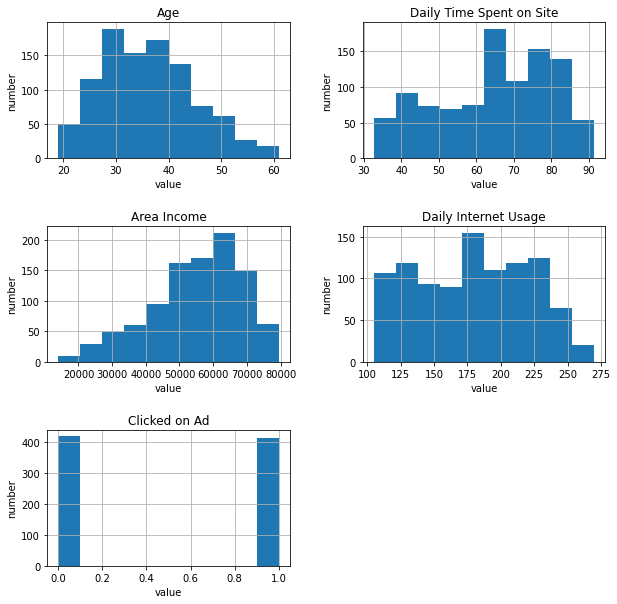

In [13]:
integerData = data[['Age','Daily Time Spent on Site','Area Income','Daily Internet Usage','Clicked on Ad']]
axarr = integerData.hist(figsize = (10,10))
for ax in axarr.flatten():
    ax.set_xlabel("value")
    ax.set_ylabel("number")
plt.subplots_adjust(hspace=0.5) 

### Part 9
Another part of preprocessing data sets is normalization. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

In [14]:
meanData = integerData.mean()
stdData = integerData.std()
normalizedData = (integerData - meanData) / stdData
axarr = normalizedData.hist(figsize = (10,10))
for ax in axarr.flatten():
    ax.set_xlabel("normalized value")
    ax.set_ylabel("number")
plt.subplots_adjust(hspace=0.5) 

### Part 10
We are trying to find the feature which has the most effect on the final result. In order to find this feature, data set is seperated into clicked and not clicked data. For each of these data sets, <code>PDF</code> is caculated and drawn in the same plot. The best feature is the feature which has the least area below the intersection of the plots. 

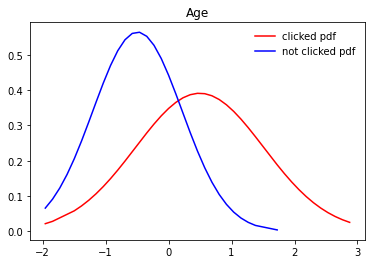

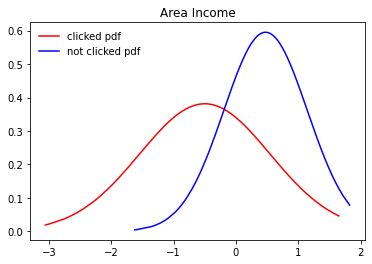

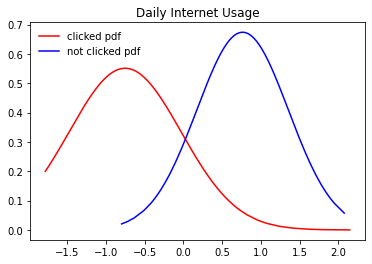

In [15]:
clicked = normalizedData[integerData['Clicked on Ad'] == 1]
clickedMean = clicked.mean()
clickedStd = clicked.std()

notClicked = normalizedData[integerData['Clicked on Ad'] == 0]
notClickedMean = notClicked.mean()
notClickedStd = notClicked.std()

for col in ['Age','Daily Time Spent on Site','Area Income','Daily Internet Usage']:
    x = clicked[col].sort_values()
    plt.plot(x, norm.pdf(x,clickedMean[col],clickedStd[col]),'r-', label='clicked pdf')
    y = notClicked[col].sort_values()
    plt.plot(y, norm.pdf(y, notClickedMean[col], notClickedStd[col]), 'b-', label='not clicked pdf')
    plt.title(col)
    plt.legend(loc='best', frameon=False)
    plt.show()


### Part 11

In [16]:
nanClicks = normalizedData[normalizedData['Clicked on Ad'].isnull()]
bestFeature = 'Daily Internet Usage'
f = open("prediction.csv", "a")
f.write("Unnamed: 0,Clicked on Ad\n")
for index,row in nanClicks.iterrows():
    clickRange = (clickedMean[bestFeature] - clickedStd[bestFeature], clickedMean[bestFeature] + clickedStd[bestFeature])
    notClickRange = (notClickedMean[bestFeature] - notClickedStd[bestFeature], notClickedMean[bestFeature] + notClickedStd[bestFeature])
    if (row[bestFeature] >= clickRange[0]) and (row[bestFeature] <= clickRange[1]):
        f.write(str(index) + ",1\n")
        row['Clicked on Ad'] = 1
    elif(row[bestFeature] >= notClickRange[0]) and (row[bestFeature] <= notClickRange[1]):
        f.write(str(index) + ",0\n")
        row['Clicked on Ad'] = 0
    else:
        f.write(str(index) + ",0\n")
        row['Clicked on Ad'] = 0
f.close()